In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
backup = pd.read_csv('train.csv', index_col='PassengerId')
df = backup.copy()

<center><h1> EDA </h1></center>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Y : Survived

- No_use : Name

- Troubling : Ticket

- Categories : Pclass, Sex, SibSp, Parch, Cabin, Embarked

- Numerical : Age, Fare

<center><h1> Try 1. Deleting NaN </h1></center>

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 2 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Name      183 non-null    object 
 3   Sex       183 non-null    object 
 4   Age       183 non-null    float64
 5   SibSp     183 non-null    int64  
 6   Parch     183 non-null    int64  
 7   Ticket    183 non-null    object 
 8   Fare      183 non-null    float64
 9   Cabin     183 non-null    object 
 10  Embarked  183 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 17.2+ KB


In [8]:
df_fst = df[['Age', 'Fare']]

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score

In [10]:
SS = StandardScaler()
LE = LabelEncoder()

In [11]:
X = df_fst
y = df['Survived']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [13]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', LogisticRegression())
])

In [14]:
pipe.fit(X_train, y_train)
yhat = pipe.predict(X_test)

<center> Метрика качества - <b>roc_auc_score</b> </center>

In [15]:
roc_auc_score(y_test, yhat)

0.5278532608695652

<center><h1> Try 2. Full prediction </h1></center>

In [16]:
df = backup.copy()

Удалим признаки: <b>Name, Ticket</b>
- Name - потому что признак не несёт смысловой нагрузки (Кроме стратегии, где можно выделить статус/титул типа Miss, Mr.)
- Ticket - В принципе, можно вычислить класс из кодировки билета, но на кеггл этот способ, кажется, не приносил особенных результатов в плане точности модели. Пока попробуем удалить

In [17]:
df = df.drop(columns=['Name', 'Ticket'], axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [19]:
print(
    f'{round((1 - len(df.dropna()) / len(df)) * 100)}% данных имеют пропущенные значения'
)

79% данных имеют пропущенные значения


Заполняем пустые значения

In [20]:
df.loc[df['Age'].isnull(), 'Age'] = df['Age'].mean() # Ages with mean

In [21]:
df['Cabin'] = df['Cabin'].fillna(0)
df.loc[df['Cabin'] != 0, 'Cabin'] = 1

In [22]:
df[df['Embarked'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
62,1,1,female,38.0,0,0,80.0,1,NaN
830,1,1,female,62.0,0,0,80.0,1,NaN


In [23]:
for i in df['Embarked'].dropna().unique():
    print(f'{i} - {min(df.loc[df["Embarked"] == i]["Fare"])}')
    print(f'{i} - {(df.loc[df["Embarked"] == i]["Fare"]).mean()}')
    print(f'{i} - {max(df.loc[df["Embarked"] == i]["Fare"])}')

S - 0.0
S - 27.079811801242233
S - 263.0
C - 4.0125
C - 59.95414404761905
C - 512.3292
Q - 6.75
Q - 13.276029870129872
Q - 90.0


Судя по цене билета, они скорее всего, сели в точке "C"
По-хорошему нужно бы проверить через тип кабины и дополнительные фичи сервиса

In [24]:
df['Embarked'] = df['Embarked'].fillna('C')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [26]:
df['Age'] = SS.fit_transform(df[['Age']])
df['Fare'] = SS.fit_transform(df[['Fare']])
df['Sex'] = LE.fit_transform(df['Sex'])
df['Cabin'] = LE.fit_transform(df['Cabin'])
df['Embarked'] = LE.fit_transform(df['Embarked'])

In [27]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,1,-0.592481,1,0,-0.502445,0,2
2,1,1,0,0.638789,1,0,0.786845,1,0
3,1,3,0,-0.284663,0,0,-0.488854,0,2
4,1,1,0,0.407926,1,0,0.420730,1,2
5,0,3,1,0.407926,0,0,-0.486337,0,2
...,...,...,...,...,...,...,...,...,...
887,0,2,1,-0.207709,0,0,-0.386671,0,2
888,1,1,0,-0.823344,0,0,-0.044381,1,2
889,0,3,0,0.000000,1,2,-0.176263,0,2


In [28]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,8.910000e+02,891.000000,891.000000
mean,0.383838,2.308642,0.647587,2.232906e-16,0.523008,0.381594,3.987333e-18,0.228956,1.531987
std,0.486592,0.836071,0.477990,1.000562e+00,1.102743,0.806057,1.000562e+00,0.420397,0.794531
min,0.000000,1.000000,0.000000,-2.253155e+00,0.000000,0.000000,-6.484217e-01,0.000000,0.000000
25%,0.000000,2.000000,0.000000,-5.924806e-01,0.000000,0.000000,-4.891482e-01,0.000000,1.000000
50%,0.000000,3.000000,1.000000,0.000000e+00,0.000000,0.000000,-3.573909e-01,0.000000,2.000000
75%,1.000000,3.000000,1.000000,4.079260e-01,1.000000,0.000000,-2.424635e-02,0.000000,2.000000
max,1.000000,3.000000,1.000000,3.870872e+00,8.000000,6.000000,9.667167e+00,1.000000,2.000000


<center><h1> Visualize </h1></center>

<Axes: xlabel='Sex', ylabel='Count'>

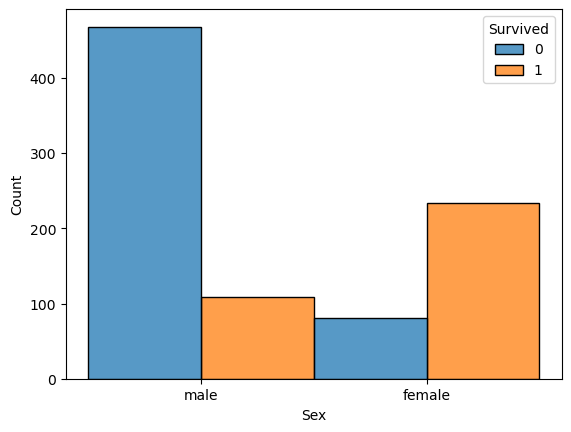

In [29]:
sns.histplot(backup, x='Sex', hue='Survived', multiple='dodge', element='bars')

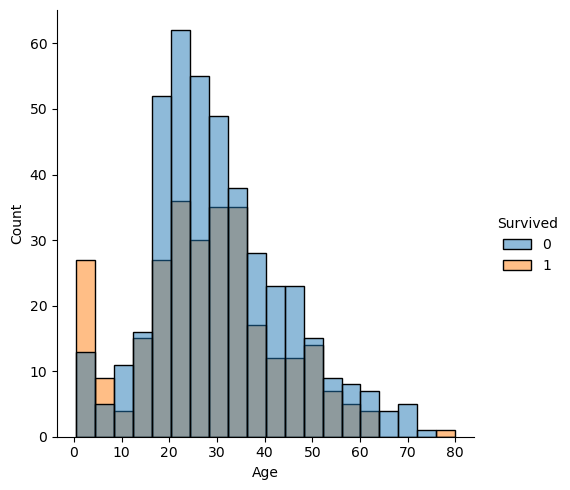

In [30]:
sns.displot(data=backup, x='Age', hue='Survived')

<Axes: xlabel='Cabin', ylabel='Count'>

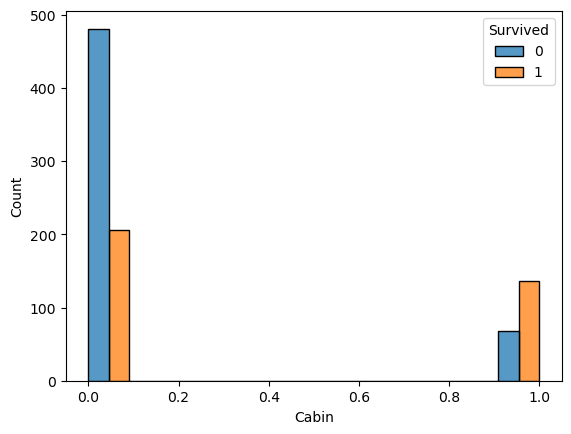

In [31]:
sns.histplot(data=df, x='Cabin', hue='Survived', multiple='dodge')

<center><h1> Model #2 </h1></center>

In [32]:
X = df.drop(columns='Survived', axis=1)
y = df['Survived']

In [33]:
X = pd.get_dummies(X, columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked'])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [35]:
model = LogisticRegression()

In [36]:
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
yhat = model.predict(X_test)

In [38]:
roc_auc_score(y_test, yhat)

0.8095689808501808